# Projeto 2: Respondendo Perguntas de Negócios na Área de Varejo

O objetivo é responder 10 perguntas de negócio a partir de um dataset sobre uma rede de varejo que comercializa diversos produtos em diversas cidades dos EUA.

### Parte1: Obtenção do Dados


In [11]:
#Importando os pacotes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats


In [12]:
#Carregando os dados do CSV
varejo_df = pd.read_csv('dados/dataset.csv')

In [13]:
#Shape
shape = varejo_df.shape
print("Número de linhas:\t{}\nNúmero de Colunas:\t{}".format(shape[0],shape[1]))

Número de linhas:	9700
Número de Colunas:	11


In [14]:
#Amostra dos dados
varejo_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


### Parte2: Exploração do Dados 
Nesta etapa, vamos analisar as variáveis estudadas, entendendo seus nomes, tipos, verificar se existem valores ausentes e compreender a distribuição estatística desses dados.

In [15]:
#Entendendo quais são as colunas existentes e seu tipo

display(varejo_df.dtypes)

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [16]:
#Verificando a existência de valores ausentes
varejo_df.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [17]:
#Verificando a existência de valores duplicados
varejo_df[varejo_df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [18]:
#Entendo da distribuição estatística da variável valor_venda
varejo_df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [19]:
#Verificando a normalidade dos dados com o teste de Shapiro-Wilk
resultado_teste = stats.shapiro(varejo_df['Valor_Venda'])
valor_p = resultado_teste.pvalue
alpha = 0.05
if valor_p > alpha:
    print("A distribuição dos dados segue uma distribuição normal (p > alpha)")
else:
    print("A distribuição dos dados não segue uma distribuição normal (p <= alpha)")

A distribuição dos dados não segue uma distribuição normal (p <= alpha)


C:\Users\motae\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


array([[<Axes: title={'center': 'Valor_Venda'}>]], dtype=object)

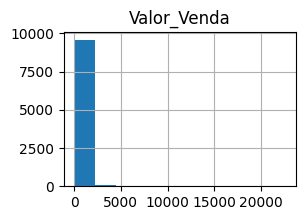

In [20]:
#Histograma do valor_venda
varejo_df.hist(figsize=(3,2))

## Pergunta1: Qual a cidade com maior valor de venda de produtos da categoria ' Office Supplies?

In [21]:
#Calcula os valores máximo

cidades_categoria = varejo_df[varejo_df['Categoria'] == 'Office Supplies']
cidades_venda = cidades_categoria.groupby('Cidade')['Valor_Venda'].sum()
cidades_maxima = cidades_venda.idxmax()
print(cidades_maxima)



New York City


## Pergunta2: Qual o Total de Vendas Por Data do Pedido?
Demonstre o resultado através de um gráfico de barras

In [22]:
#Vendas por data
vendas_data = varejo_df.groupby('Data_Pedido')['Valor_Venda'].sum()
vendas_data.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

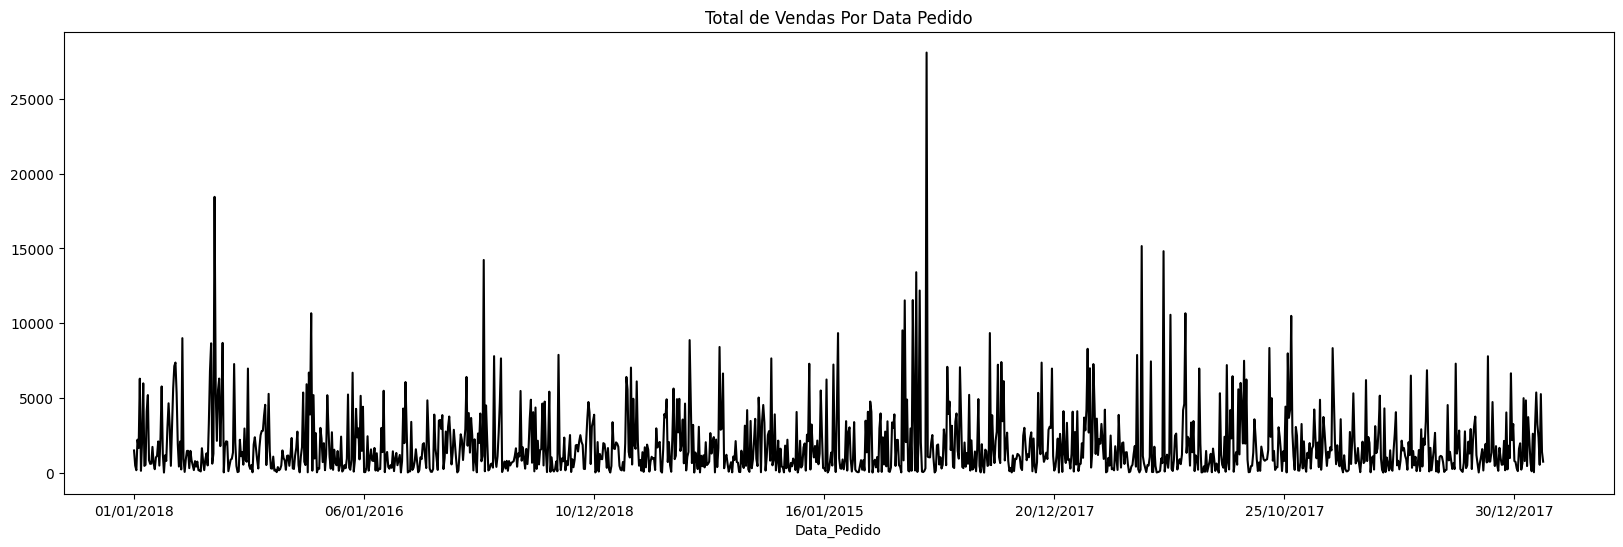

In [23]:
#Criando o gráfico
plt.figure(figsize = (20,6))
vendas_data.plot(x='Data_Pedido', y = 'Valor_Venda', color = 'k')
plt.title("Total de Vendas Por Data Pedido")
plt.show()
#Obs: Nessa análise estamos tratando a data pedido como variável categórica e não como série temporal.

## Pergunta3: Qual o total de vendas por Estado?
Demonstre esse resultado através do gráfico de barras


In [26]:
#Calculando o total de vendas por estado
vendas_estado =  varejo_df.groupby('Estado')['Valor_Venda'].sum().reset_index()
vendas_estado.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


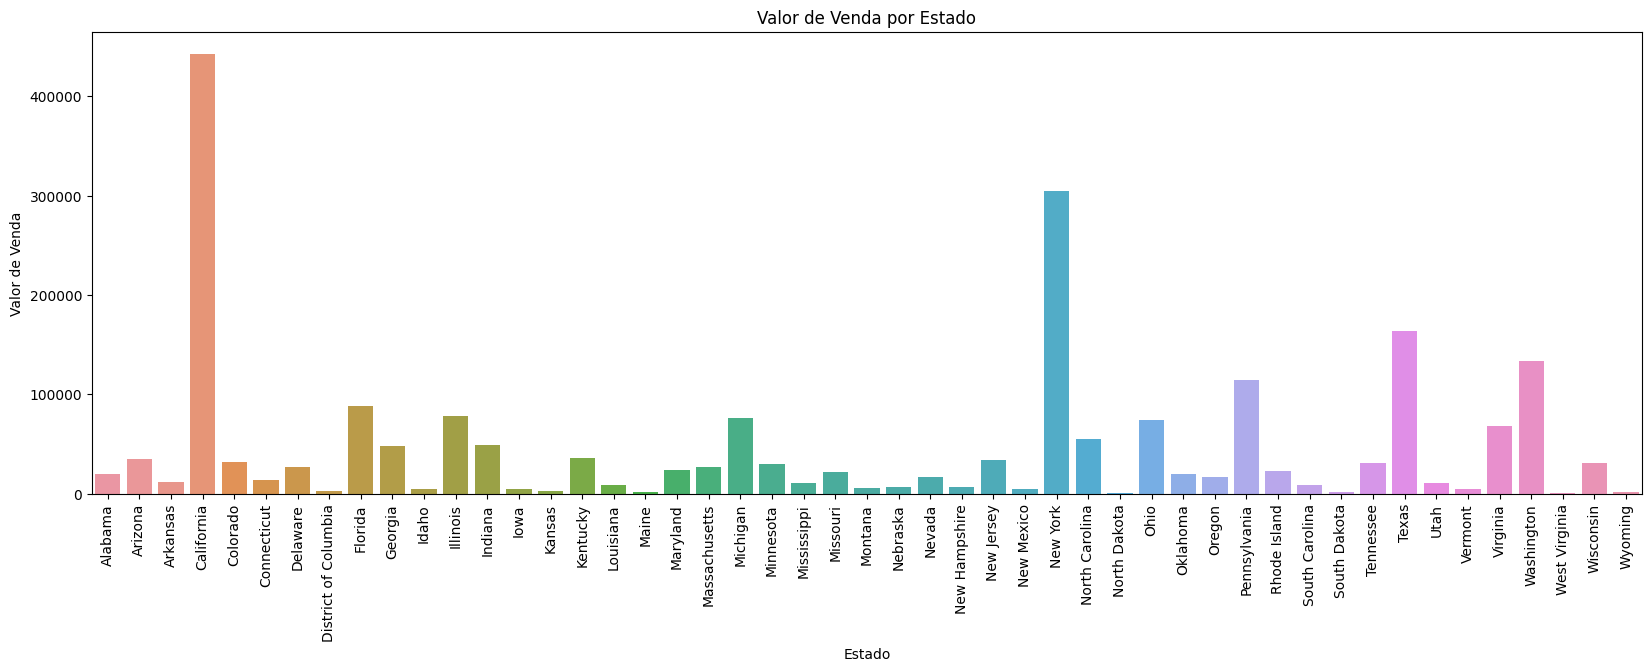

In [27]:
#Criando gráfico usando seaborn
plt.figure(figsize = (20,6))
sns.barplot(x='Estado', y='Valor_Venda', data=vendas_estado)
plt.xlabel('Estado')
plt.ylabel('Valor de Venda')
plt.title('Valor de Venda por Estado')
plt.xticks(rotation = 90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Pergunta4: Quais são as 10 Cidades com Maior Total de Vendas?
Demonstre esse resultado através do gráfico de barras 

In [28]:
vendas_cidade =  varejo_df.groupby('Cidade')['Valor_Venda'].sum().reset_index()
vendas_cidade_top10 = vendas_cidade.nlargest(10, 'Valor_Venda')
vendas_cidade_top10.head()

,Cidade,Valor_Venda
327,New York City,251749.219
265,Los Angeles,171654.633
450,Seattle,114725.478
436,San Francisco,107489.952
372,Philadelphia,107197.803


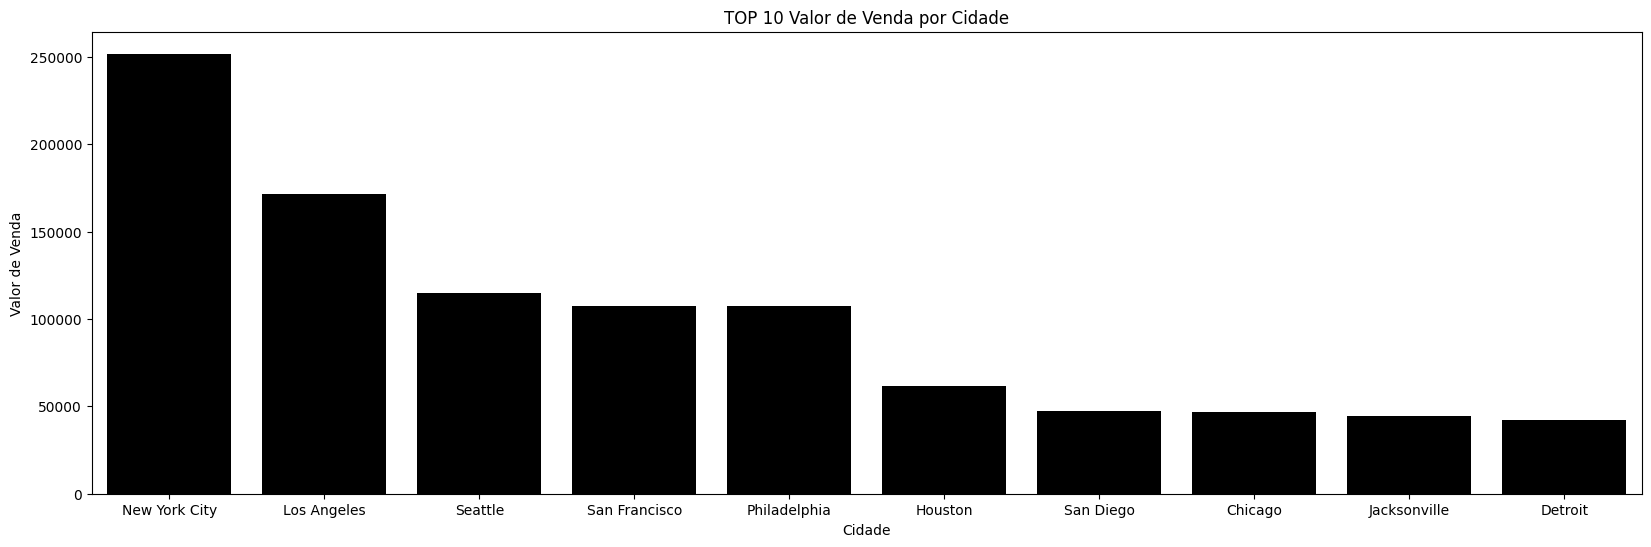

In [29]:
#Criando gráfico usando seaborn
plt.figure(figsize = (20,6))
sns.barplot(x='Cidade', y='Valor_Venda', data=vendas_cidade_top10, color = 'k')
plt.title('TOP 10 Valor de Venda por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Valor de Venda')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Pergunta5: Qual Segmento Teve o Maior Total de Vendas? 
Demonstre esse resultado através do gráfico de barras

In [30]:
segmento_vendas = varejo_df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending = False)
segmento_vendas['Valor_Venda'] = segmento_vendas['Valor_Venda'].round(2)
segmento_vendas.head()

,Segmento,Valor_Venda
0,Consumer,1133834.34
1,Corporate,679232.19
2,Home Office,422491.43


In [31]:
#Convertando os dados em valor absoluto
def autopct_formatar (values):
    def formato(pct):
        total = sum(values)
        val = int(round(pct*total/100))
        return '$ {v:d}'.format(v=val)
    return formato

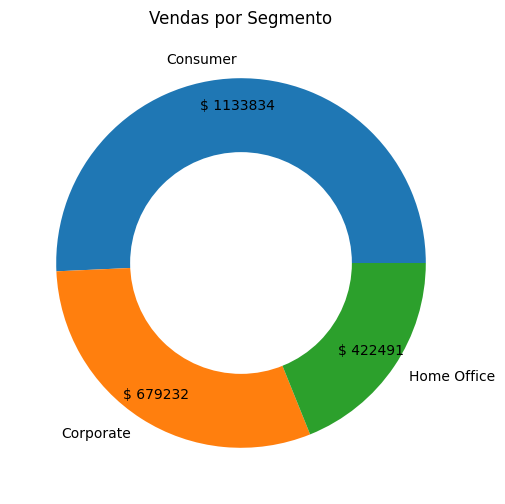

In [32]:
#Criando gráfico de pizza
plt.figure(figsize=(18, 6))

# Gráfico de pizza
plt.pie(segmento_vendas['Valor_Venda'],
        labels=segmento_vendas['Segmento'],
        autopct=autopct_formatar(segmento_vendas['Valor_Venda']),
       pctdistance=0.85)

# Círculo no centro do gráfico de pizza
centro_circulo = plt.Circle((0,0),0.6, fc= 'white')
fig = plt.gcf() #obtém a figura atual do matplotlib, gcf = "get current figure" 
fig.gca().add_artist(centro_circulo) #fig.gca() obtém o eixo atual da figura e o add_artist adiciona o objeto centro_circulo

plt.title('Vendas por Segmento')

plt.show()

## Pegunta 6: Qual o total de Vendas Por Segmento e Por Ano? 

In [33]:
varejo_df['Data_Pedido'] = pd.to_datetime(varejo_df['Data_Pedido'], dayfirst = True) 

In [34]:
display(varejo_df.dtypes)

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [35]:
varejo_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [36]:
varejo_df['Ano'] = varejo_df['Data_Pedido'].dt.year #Extraindo o ano da coluna data

In [37]:
varejo_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [38]:
vendas_seg_ano =  varejo_df.groupby(['Segmento','Ano'])['Valor_Venda']\
                            .sum()\
                            .reset_index()\
                            .sort_values(by='Ano', ascending = True)

In [39]:
vendas_seg_ano 

,Segmento,Ano,Valor_Venda
0,Consumer,2015,256719.9166
4,Corporate,2015,125819.5957
8,Home Office,2015,88229.0878
1,Consumer,2016,265295.2593
5,Corporate,2016,114643.1229
9,Home Office,2016,74134.1332
2,Consumer,2017,288459.5572
6,Corporate,2017,203266.7398
10,Home Office,2017,103639.6270
3,Consumer,2018,323359.6019


## Pergunta 7: Quantas Vendas Receberam 15% de Desconto?

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

    - Se o Valor_Venda for maior que 1000 recebe 15% de desconto;
    - Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

In [40]:
def desconto_aplicado(valor):
    if valor > 1000:
        return 0.15
    else:
        return 0.10
    
varejo_df['Desconto'] = varejo_df['Valor_Venda'].apply(lambda x:desconto_aplicado(x) )

In [41]:
varejo_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [42]:
varejo_df['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

## Pergunta 8: Considere que a empresa decida conceder o desconto de 15% do item anterior. Qual seria a média do valor de venda antes e depois do desconto? 

In [43]:
varejo_df['valor_com_desconto'] = varejo_df['Valor_Venda'] -  varejo_df['Valor_Venda'] * varejo_df['Desconto']                              

In [44]:
varejo_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,valor_com_desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [52]:
#Filtrando o valor venda antes do desconto de 15%
varejo_df_vendas_antes_desconto = varejo_df.loc[varejo_df['Desconto'] == 0.15, 'Valor_Venda']

In [53]:
#Filtrando o valor com desconto de 15%
varejo_df_vendas_depois_desconto = varejo_df.loc[varejo_df['Desconto'] == 0.15, 'valor_com_desconto']

In [54]:
varejo_df_media_antes_desconto = varejo_df_vendas_antes_desconto.mean()

In [57]:
varejo_df_media_depois_desconto = varejo_df_vendas_depois_desconto.mean()

In [58]:
print("Média de vendas com desconto é {:.2f} e sem desconto é {:.2f}"\
      .format(varejo_df_media_antes_desconto, varejo_df_media_depois_desconto))

Média de vendas com desconto é 2116.81 e sem desconto é 1799.29


## Pergunta 9: Qual média de vendas por segmento, por ano e por mês?

In [59]:
#Extraindo o mês e gravando em uma tabela
varejo_df['Mes'] = varejo_df['Data_Pedido'].dt.month

In [60]:
varejo_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,valor_com_desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [79]:
#Média por segmento, ano e mes
varejo_df_media_san = varejo_df.groupby(['Segmento', 'Ano','Mes'])['Valor_Venda'].mean().reset_index()

In [80]:
varejo_df_media_san

,Segmento,Ano,Mes,Valor_Venda
0,Consumer,2015,1,146.736787
1,Consumer,2015,2,117.327926
2,Consumer,2015,3,152.170564
3,Consumer,2015,4,189.762750
4,Consumer,2015,5,191.337439
...,...,...,...,...
139,Home Office,2018,8,176.160606
140,Home Office,2018,9,249.140597
141,Home Office,2018,10,412.576597
142,Home Office,2018,11,247.519423


In [84]:
#Extraindo os níveis
segmentos = varejo_df_media_san['Segmento']
anos = varejo_df_media_san['Ano']
mes = varejo_df_media_san['Mes']

<Figure size 2000x600 with 0 Axes>

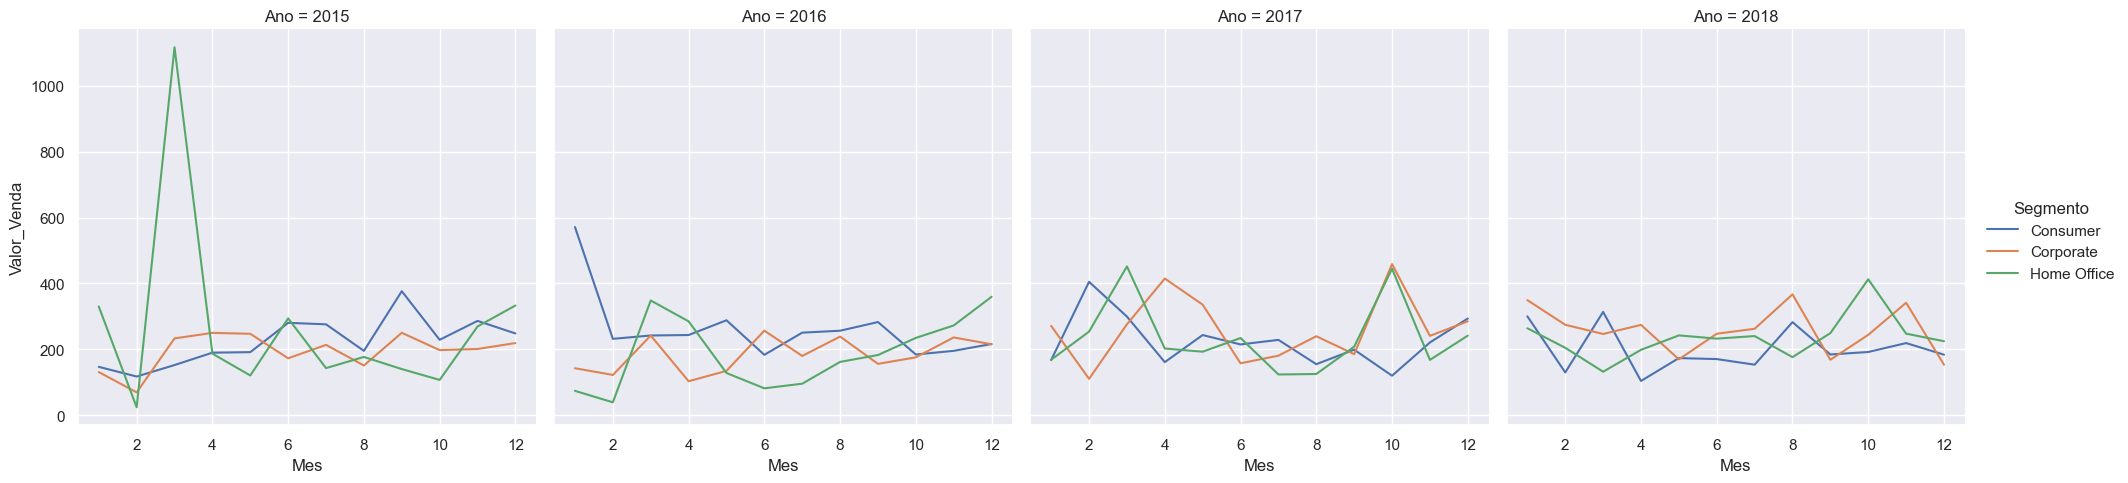

In [91]:
#Criando gráfico
plt.figure(figsize=(20, 6))
sns.set()

fig1 = sns.relplot( kind = 'line',
                    data=varejo_df_media_san,
                    x=mes,
                    y='Valor_Venda',
                    hue=segmentos,
                    col=anos,
                    col_wrap=4)

plt.show()


## Pergunta 10: Qual total de vendas por categoria e subcategoria, considerando somente as top 12 categorias?


In [110]:
varejo_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,valor_com_desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [111]:
#Pegando o top 12 vendas por categoria e subcategoria
top12_categoria_subcategoria = varejo_df.groupby(['Categoria','SubCategoria'])\
                                                .sum(numeric_only= True)\
                                                .sort_values(by='Valor_Venda', ascending = False).head(12)

In [113]:
top12_categoria_subcategoria = top12_categoria_subcategoria[['Valor_Venda']]\
                                                            .astype(int)\
                                                            .sort_values(by = 'Categoria')\
                                                            .reset_index()

In [114]:
top12_categoria_subcategoria

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [115]:
top12_categoria = top12_categoria_subcategoria.groupby('Categoria').sum(numeric_only = True).reset_index()

In [116]:
top12_categoria

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.]),
 [Text(0, 0.0, '0'),
  Text(0, 200000.0, '200000'),
  Text(0, 400000.0, '400000'),
  Text(0, 600000.0, '600000'),
  Text(0, 800000.0, '800000'),
  Text(0, 1000000.0, '1000000')])

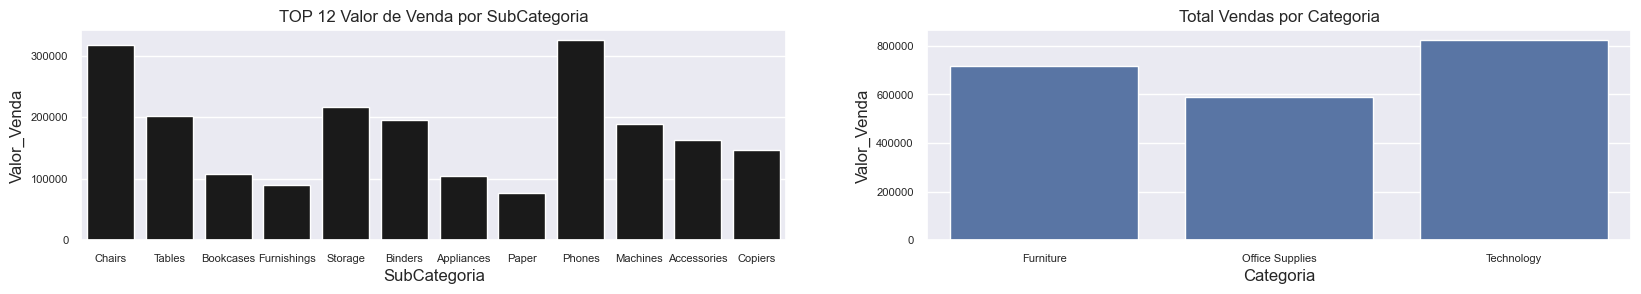

In [134]:
#definindo o tamanho das figuras
fig =plt.figure(figsize=(20, 6))

# Gráfico 1 - Barras de Count
fig.add_subplot(221)
sns.barplot(x='SubCategoria', y='Valor_Venda', data=top12_categoria_subcategoria, color = 'k')
plt.title('TOP 12 Valor de Venda por SubCategoria')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)



# Gráfico 2 - Gráfico de pizza
fig.add_subplot(222)
sns.barplot(x='Categoria', y='Valor_Venda', data=top12_categoria, color = 'b')
plt.title('Total Vendas por Categoria')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

## FIM